In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis de Supermarket 

In [2]:
from df_1_file import df_1

In [3]:
df_1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Sales Income,gross margin percentage,gross income,Rating
0,750-67-8428,A,Santander,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2023,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Madrid,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2023,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Santander,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2023,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Santander,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2023,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Santander,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2023,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Madrid,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2023,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Valladolid,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2023,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Santander,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2023,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Santander,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2023,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  Sales Income             1000 non-null   float64
 14  gross margin percentage  

### Línea de producto que compra cada género.

In [5]:
# Primero, agrupamos los datos por 'Gender' y 'Product line', contando las ocurrencias
gender_product_counts = df_1.groupby(['Gender', 'Product line']).size().reset_index(name='count')

# Luego, creamos una tabla pivote para tener una vista más clara de los datos
gender_product_pivot = gender_product_counts.pivot_table(index='Gender', columns='Product line', values='count', fill_value=0)

print(gender_product_pivot)


Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                          84.0                 96.0                90.0   
Male                            86.0                 82.0                84.0   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Gender                                                                  
Female                     64.0                79.0               88.0  
Male                       88.0                81.0               78.0  


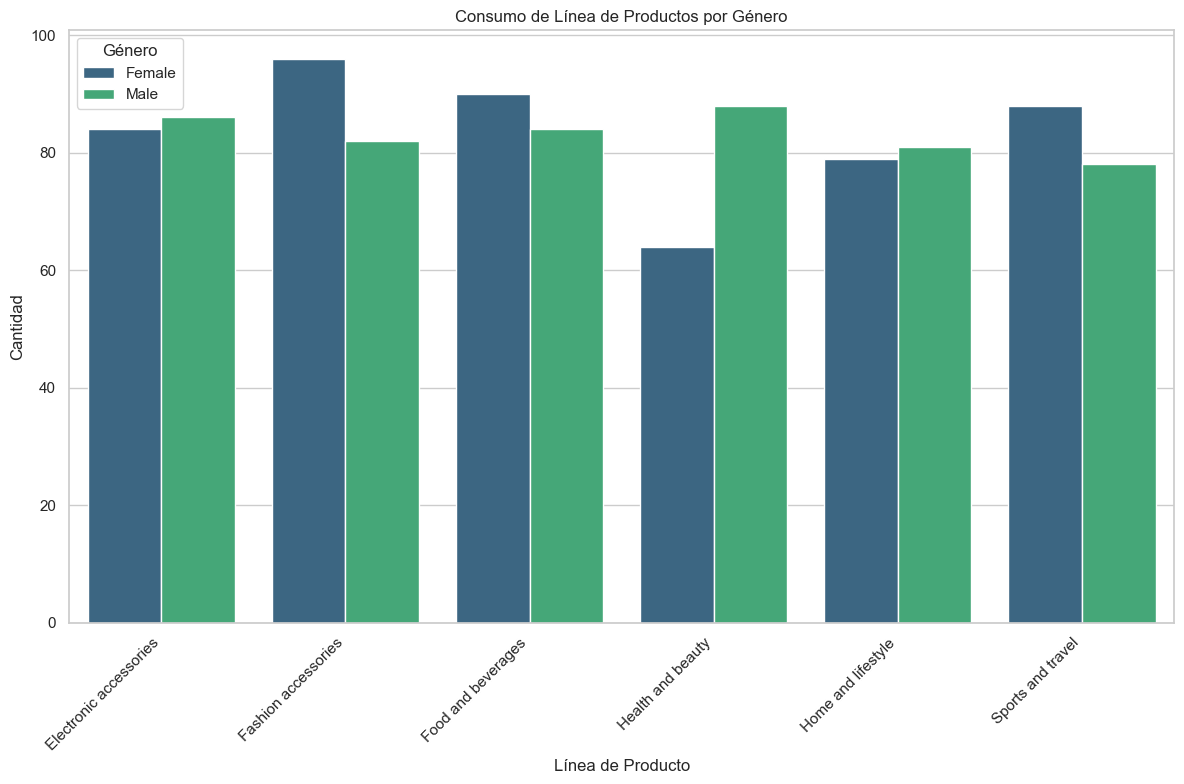

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la tabla pivote con barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(data=gender_product_counts, x='Product line', y='count', hue='Gender', palette='viridis')
plt.title('Consumo de Línea de Productos por Género')
plt.xlabel('Línea de Producto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para una mejor legibilidad
plt.legend(title='Género')
plt.tight_layout()
plt.show()



Las mujeres son las que más productos de 'Fashion accesories' compran. Los hombres, por otro lado, compran más productos de 'Health and beauty'.

### Línea de producto por cada tienda

In [7]:
# Primero, agrupamos los datos por 'City' y 'Product line', contando las ocurrencias
city_product_counts = df_1.groupby(['City', 'Product line']).size().reset_index(name='count')

# Ordenamos el DataFrame por 'count' de manera descendente para cada ciudad
city_product_counts_sorted = city_product_counts.sort_values(by=['City', 'count'], ascending=[True, False])

# Iteramos sobre cada ciudad y mostramos las líneas de productos ordenadas
for city, data in city_product_counts_sorted.groupby('City'):
    print(f"City: {city}")
    print(data)
    print()


City: Madrid
     City            Product line  count
2  Madrid      Food and beverages     66
1  Madrid     Fashion accessories     65
0  Madrid  Electronic accessories     55
3  Madrid       Health and beauty     52
4  Madrid      Home and lifestyle     45
5  Madrid       Sports and travel     45

City: Santander
         City            Product line  count
10  Santander      Home and lifestyle     65
6   Santander  Electronic accessories     60
11  Santander       Sports and travel     59
8   Santander      Food and beverages     58
7   Santander     Fashion accessories     51
9   Santander       Health and beauty     47

City: Valladolid
          City            Product line  count
13  Valladolid     Fashion accessories     62
17  Valladolid       Sports and travel     62
12  Valladolid  Electronic accessories     55
15  Valladolid       Health and beauty     53
14  Valladolid      Food and beverages     50
16  Valladolid      Home and lifestyle     50



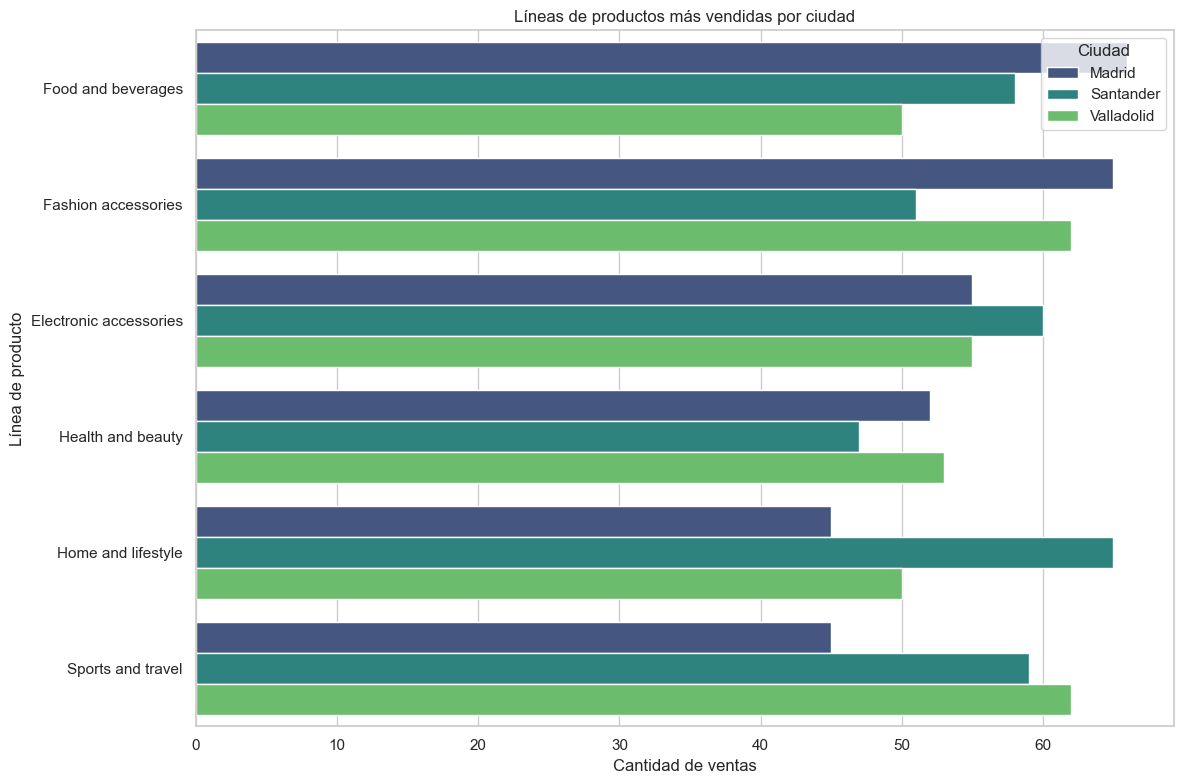

In [8]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar para cada ciudad
plt.figure(figsize=(12, 8))
sns.barplot(data=city_product_counts_sorted, x='count', y='Product line', hue='City', palette='viridis')
plt.title('Líneas de productos más vendidas por ciudad')
plt.xlabel('Cantidad de ventas')
plt.ylabel('Línea de producto')
plt.legend(title='Ciudad')
plt.tight_layout()
plt.show()


Teniendo en cuenta que nos interesa saber dónde se compran más 'Fashion accesories':

1º Madrid

2º Valladolid

3º Santander

### Ingresos totales máximos

In [13]:
# Creamos una nueva columna 'Total Income' que representa el ingreso total de cada venta
df_1['Total Income'] = df_1['Unit price'] * df_1['Quantity']

# Creamos una tabla pivote para mostrar los ingresos totales de cada línea de productos para cada ciudad
city_product_income = df_1.pivot_table(index='City', columns='Product line', values='Total Income', aggfunc='sum', fill_value=0)

# Calculamos el total de ingresos por ciudad
city_product_income['Total'] = city_product_income.sum(axis=1)

print(city_product_income)


Product line  Electronic accessories  Fashion accessories  Food and beverages  \
City                                                                            
Madrid                      18065.69             20533.40            22635.10   
Santander                   17444.87             15554.77            16345.81   
Valladolid                  16239.47             15631.73            14490.37   

Product line  Health and beauty  Home and lifestyle  Sports and travel  \
City                                                                     
Madrid                 15824.12            13233.86           15011.36   
Santander              11997.86            21349.71           18450.19   
Valladolid             19029.20            16713.49           19036.38   

Product line      Total  
City                     
Madrid        105303.53  
Santander     101143.21  
Valladolid    101140.64  


<Figure size 1200x800 with 0 Axes>

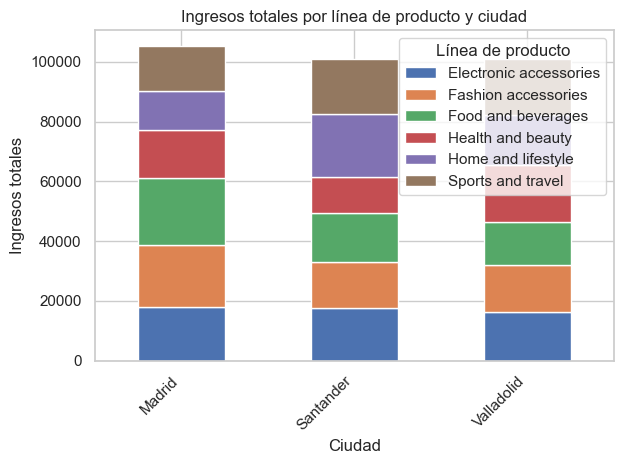

In [14]:

# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar los ingresos totales de cada línea de productos para cada ciudad
plt.figure(figsize=(12, 8))
city_product_income.drop('Total', axis=1).plot(kind='bar', stacked=True)
plt.title('Ingresos totales por línea de producto y ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Línea de producto')
plt.tight_layout()
plt.show()


El punto de venta con mayores ingresos en Madrid. Además, se vuelve a remarcar que la compra de productos de 'Fashion Accesories' sigue siendo mayor que en el resto de ciudades.

### Clientes miembros y normales de cada ciudad y su método de pago

In [16]:
# DataFrame para contar la cantidad de clientes miembros y normales por ciudad
customer_type_counts = df_1.groupby(['City', 'Customer type'])['Invoice ID'].count().unstack(fill_value=0)
customer_type_counts.columns.name = None  # Eliminamos el nombre de la columna 'Customer type'

print("Cantidad de clientes miembros y normales por ciudad:")
print(customer_type_counts)


Cantidad de clientes miembros y normales por ciudad:
            Member  Normal
City                      
Madrid         169     159
Santander      167     173
Valladolid     165     167


In [17]:
# DataFrame para mostrar el método de pago de cada cliente por ciudad
payment_method_by_customer = df_1.groupby(['City', 'Customer type', 'Payment']).size().unstack(fill_value=0)
payment_method_by_customer.columns.name = None  # Eliminamos el nombre de la columna 'Payment'

print("\nMétodo de pago de cada cliente por ciudad:")
print(payment_method_by_customer)



Método de pago de cada cliente por ciudad:
                          Cash  Credit card  Ewallet
City       Customer type                            
Madrid     Member           59           60       50
           Normal           65           38       56
Santander  Member           56           49       62
           Normal           54           55       64
Valladolid Member           53           63       49
           Normal           57           46       64


In [18]:
# Calculamos la suma de cada fila para obtener el total de cada tipo de cliente por ciudad
payment_method_by_customer['Total'] = payment_method_by_customer.sum(axis=1)

print("\nMétodo de pago de cada cliente por ciudad con total por tipo de cliente:")
print(payment_method_by_customer)



Método de pago de cada cliente por ciudad con total por tipo de cliente:
                          Cash  Credit card  Ewallet  Total
City       Customer type                                   
Madrid     Member           59           60       50    169
           Normal           65           38       56    159
Santander  Member           56           49       62    167
           Normal           54           55       64    173
Valladolid Member           53           63       49    165
           Normal           57           46       64    167


<Figure size 1200x800 with 0 Axes>

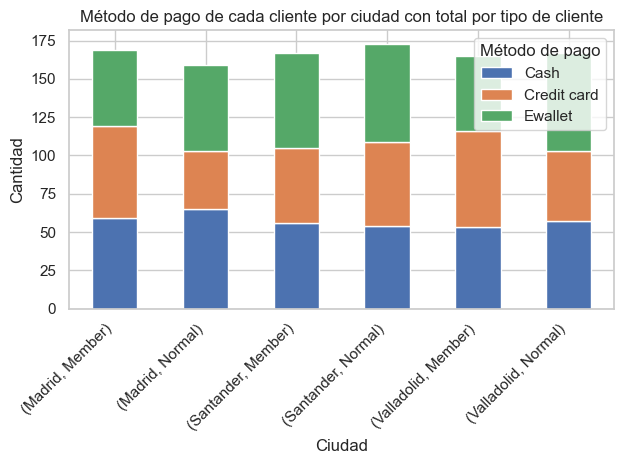

In [19]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar el DataFrame
plt.figure(figsize=(12, 8))
payment_method_by_customer.drop('Total', axis=1).plot(kind='bar', stacked=True)
plt.title('Método de pago de cada cliente por ciudad con total por tipo de cliente')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Método de pago')
plt.tight_layout()
plt.show()


Madrid: Más Members(credit card) que Normal(cash)

Santander: Más Normal(Ewallet) que Memebers(Ewallet)

Valladolid: Más Normal(Ewallet) que Memebers(credit card)



El que más normal = Santander

El que más member = Madrid 

# ¿QUÉ ES FAVORABLE PARA CHARO-L?

- Que compren mujeres
- Que compren bolsos
- El lugar puede coincidir con la localidad desde donde se realizan las compras de nuestros bolsos por la web.
- Que las compras por partes de los miembros son recurrentes, puede ser un indicio en cuanto a la probabilidad de que compren nuestro producto. Sobre todo si dichos miembros compran accesorios de moda.
- El método de pago por Ewallet nos puede indicar que esos clientes pueden ser propensos a comprar de manera online por lo que, de cada a furuto, puede llevarse alguna campaña de marketing para fomentar la compra online de nuestros productos en dicha localidad.



##### Mejoras para la toma de decisiones

- Saber la media de edad de las mujeres que compran en el Corte Inglés y ver si coincide con nuestro público objetivo.
- Tener información financiera acerca del coste de inversión, coste de fabricación, ventas históricas, étc. Todo esto para poder calcular la rentabilidad, el ROI, previsión de ventas... Un enfoque financiero para poder tomar la decisión de manera más acertada.
- Análisis de imagen de marca y demanda es lo único que podemos hacer con estos datasets.